# Chapter2: Before we begin: the mathematical building blocks of neural networks

## 2.2 Data representation for neural networks

### 2.2.5 Key attributes

In [1]:
from keras.datasets import mnist

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
mnist.load_data()[0][1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
print(train_images.ndim)

3


In [5]:
print(train_images.shape)

(60000, 28, 28)


In [6]:
print(train_images.dtype)

uint8


In [7]:
digit = train_images[4]

In [8]:
digit.shape

(28, 28)

In [9]:
digit.ndim

2

In [10]:
digit.dtype

dtype('uint8')

In [11]:
import matplotlib.pyplot as plt

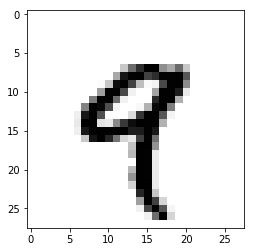

In [12]:
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

### 2.2.6 Manipulating tensors in Numpy

* selecting specific elements in a tensor is called **tensor slicing**

In [13]:
my_slice = train_images[10:100]  # 10번째부터 99번째
print(my_slice.shape)

(90, 28, 28)


In [14]:
my_slice = train_images[10:100, :, :]  # : is equivalent to selecting the entire axis
my_slice.shape

(90, 28, 28)

In [15]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

* what do you do if you want to crop the images to patches of 14X14 pixels centered in the middle?

In [16]:
my_slice2 = train_images[:, 7:-7, 7:-7]
my_slice2.shape

(60000, 14, 14)

### 2.2.7 The notion of data batchs

In [17]:
# first batch
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [18]:
# second batch
batch2 = train_images[128:256]
batch2.shape

(128, 28, 28)

In [19]:
# n-th batch
n = 10
batchn = train_images[128*(n-1):128*n]
batchn.shape

(128, 28, 28)

In [20]:
batch[0].shape

(28, 28)

In [21]:
batch[0].ndim

2

* the first axis (axis 0) is called the ***batch axis*** or ***batch dimension***

### 2.2.8 Real-world examples of data tensors

* ***Vector data*** - 2D tensors of shape (samples, features)
* ***Timeseries data or sequence data*** - 3D tensors of shape (samples, timesteps, feautres)
* ***Images*** - 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
* ***Video*** - 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

## 2.3 The gears of neural networks: tensor operations

* It is possible to add tensors, multiply tensors, and so on.

In [22]:
# keras.layers.Dense(512, activation = 'relu')
# output = relu(dot(W, input) + b)

### 2.3.1 Element-wise operations

In [23]:
import numpy as np

In [24]:
x = 1; y = -3
z = x + y    # element-wise addition
print(z)
z = np.maximum(z, 0.)    # element-wise relu
print(z)

-2
0.0


### 2.3.2 Broadcasting

What happens with addition when the shapes of the two tensors being added differ?
- When possible, and if there's no ambiguity, the smaller tensor will be *broadcasted* to match the shape of the larger tensor. Broadcasting consists of two steps:
> 1. Axes (called *broadcast axes) are added to the smaller tensor to match the **ndim** of the larger tensor.
> 2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

In [25]:
X = np.random.randint(1, 15, size = (10,2))
X

array([[ 5, 12],
       [10,  1],
       [14, 13],
       [ 2,  9],
       [ 1, 13],
       [ 9, 12],
       [ 6,  7],
       [10,  7],
       [ 3,  2],
       [ 4,  5]])

In [26]:
y = np.random. choice(10, 2)
y

array([0, 4])

In [27]:
X.shape

(10, 2)

In [28]:
y.shape

(2,)

In [29]:
X + y

array([[ 5, 16],
       [10,  5],
       [14, 17],
       [ 2, 13],
       [ 1, 17],
       [ 9, 16],
       [ 6, 11],
       [10, 11],
       [ 3,  6],
       [ 4,  9]])

In [30]:
import numpy as np

In [31]:
x = np.random.random((1, 3, 4, 2))
y = np.random.random((4, 2))

In [32]:
x

array([[[[0.77145606, 0.26750491],
         [0.39146834, 0.1442853 ],
         [0.74511636, 0.48555816],
         [0.62599911, 0.22582004]],

        [[0.50620984, 0.09594077],
         [0.5681405 , 0.29646905],
         [0.48081715, 0.93359787],
         [0.38811103, 0.85590172]],

        [[0.3612939 , 0.85756216],
         [0.43434915, 0.82435371],
         [0.65675185, 0.10087618],
         [0.46301798, 0.76391477]]]])

In [33]:
y

array([[0.1027857 , 0.94832667],
       [0.97333953, 0.49464874],
       [0.96158528, 0.27062437],
       [0.81791184, 0.55226938]])

In [34]:
z = np.maximum(x, y)
z

array([[[[0.77145606, 0.94832667],
         [0.97333953, 0.49464874],
         [0.96158528, 0.48555816],
         [0.81791184, 0.55226938]],

        [[0.50620984, 0.94832667],
         [0.97333953, 0.49464874],
         [0.96158528, 0.93359787],
         [0.81791184, 0.85590172]],

        [[0.3612939 , 0.94832667],
         [0.97333953, 0.82435371],
         [0.96158528, 0.27062437],
         [0.81791184, 0.76391477]]]])

### 2.3.3 Tensor dot

* The most common is the dot product between two matrices. You can take the dot product of two matrices ***x*** and  ***y*** (dot(x,y)) if and only if x.shape[1] == y.shape[0].
* The result is a matrix with shape (x.shape[0], y.shape[1]), where the coefficients are the vector products between the rows of ***x*** and the columns of ***y***.

### 2.3.4 Tensor reshaping

Reshaping a tensor means rearranging its rows and columns to match a target shape

In [35]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
x

array([[0., 1.],
       [2., 3.],
       [4., 5.]])

In [36]:
x.shape

(3, 2)

In [37]:
x = x.reshape(6,1)

In [38]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [39]:
x = x.reshape(2, 3)
x

array([[0., 1., 2.],
       [3., 4., 5.]])

* A special case of reshaping that's commonly encountered is ***transposition***. ***Transposing*** a matrix means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]

In [40]:
x = np.zeros((300, 20))
x.shape

(300, 20)

In [41]:
x = np.transpose(x)
x.shape

(20, 300)

## 2.4 The engine of neural networks: gradient-based optimization

### 2.4.1 What's a derivative?

For every differentiable function **f(x)**, there exists a derivative function **f'(x)** that maps values of **x** to the slope of the local linear approximation of *f* in those points.

* **differentiable** means "can be derived"
  + for example, smooth, continous functions can be derived
* The slope **a** is called the *derivative* of *f*.
  + If **a** is negative, it means a small change of x will result in a decrease of f(x)
  + If **a** is positive, a small change in x will result in an increase.

### 2.4.2 Derivative of a tensor operation: the gradient

* A **gradient** is the derivative of a tensor operation.

### 2.4.3 Stochastic gradient descent

* the term ***stochastic*** refers to the fact that each batch of data is drawn at random

* ***mini-batch stochastic gradient descent***
  1. Draw a batch of training samples x and corresponding targets y.
  2. Run the network on x to obtain prediction y_pred.
  3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
  4. Compute the gradient of the loss with regard to the network's parameters.
  5. Move the parameters a little in the opposite direction from the gradient, thus reducing the loss on the batch a bit.

### 2.4.4 Chaining derivatives: the Backpropagation algorithm

* ***Backpropagation*** strats with the final loss value and works backward from the top layers to the bottom layers, applying the chain rule to compute the contribution that each parameter had in the loss value.

## 2.5 Looking back at our first example

* input data

In [42]:
from keras.datasets import mnist

In [43]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [44]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/255

In [45]:
print(train_images.dtype)
print(train_images.shape)

print(test_images.dtype)
print(test_images.shape)

float32
(60000, 784)
float32
(10000, 784)


> the input images are stored in Numpy tensors, formatted as *float32* tensors of shape (60000, 784) and (10000, 784) respectively.

In [46]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

* network

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [48]:
network = Sequential()
network.add(Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


* network-compilation step

In [49]:
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

* training loop

In [50]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.2583 - acc: 0.9251
Epoch 2/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.1047 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.0686 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0492 - acc: 0.9855
Epoch 5/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.0366 - acc: 0.9891


* accuracy

In [51]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 85us/step


In [52]:
print('test_accuracy:', test_acc)

test_accuracy: 0.9784
